Generate conffiles

In [5]:
# a2a
make_rrg = True
make_dring = True
rtnamearr = ["ecmp","su2","su3","32disjoint","racke0"]
rt1arr = ["ecmp","su","su","kdisjoint","racke"]
rt2arr = [0,2,3,32,0]
pwnamearr = ["equal","thisweight"]
with open("/home/annzhou/DRing/src/emp/datacentre/experiments/rerun_sigcomm24/a2a.conf",'w') as f:
    # leafspine
    rtname = "ecmp"
    rt1 = "ecmp"
    rt2 = 0
    pwname = "equal"
    pwfile = f"pathweightfiles/leafspine/{rtname}/pathweight_leafspine_{rtname}_equal_64.txt"
    f.write(f"./run.sh LEAFSPINE MAKE 80 3072 64 leafspine_a2a A2A null 0 33 250 0 0 0 0 0 0 {rt1} {rt2} null 0 netpathfiles/netpath_{rtname}_leafspine.txt {pwfile} 64 50 150 200 > m_leafspine_{rtname}_a2a_{pwname}.log\n")
    
    for irtname,rtname in enumerate(rtnamearr):
        rt1 = rt1arr[irtname]
        rt2 = rt2arr[irtname]
        for pwname in pwnamearr:
            # rrg
            pwfile = f"pathweightfiles/rrg/{rtname}/a2a/pathweight_pbr1_rrg_{rtname}_a2a_lp1_barriernocrossover_64.txt" if pwname=="thisweight" else f"pathweightfiles/rrg/{rtname}/pathweight_rrg_{rtname}_equal_64.txt"
            make = "MAKE" if make_rrg else "NOMAKE"
            f.write(f"./run.sh RRG {make} 80 3072 64 rrg_a2a A2A graphfiles/ring_supergraph/rrg/instance1_80_64.edgelist 0 33 250 0 0 0 0 0 0 {rt1} {rt2} null 0 netpathfiles/netpath_{rtname}_rrg.txt {pwfile} 64 50 150 200 > m_rrg_{rtname}_a2a_{pwname}.log\n")
            make_rrg = False
            # dring
            pwfile = f"pathweightfiles/dring/{rtname}/a2a/pathweight_pbr1_dring_{rtname}_a2a_lp1_barriernocrossover_64.txt" if pwname=="thisweight" else f"pathweightfiles/dring/{rtname}/pathweight_dring_{rtname}_equal_64.txt"
            make = "MAKE" if make_dring else "NOMAKE"
            f.write(f"./run.sh RRG {make} 80 2988 64 dring_a2a A2A graphfiles/ring_supergraph/double_ring/instance1_80_64.edgelist 0 33 250 0 0 0 0 0 0 {rt1} {rt2} null 0 netpathfiles/netpath_{rtname}_dring.txt {pwfile} 64 50 150 200 > m_dring_{rtname}_a2a_{pwname}.log\n")
            make_dring = False

Analyze logfiles

In [6]:
#a2a
import pickle

with open(f'/home/annzhou/DRing/src/emp/datacentre/experiments/rerun_sigcomm24/a2a.pickle', 'rb') as handle:
    datadict = pickle.load(handle)

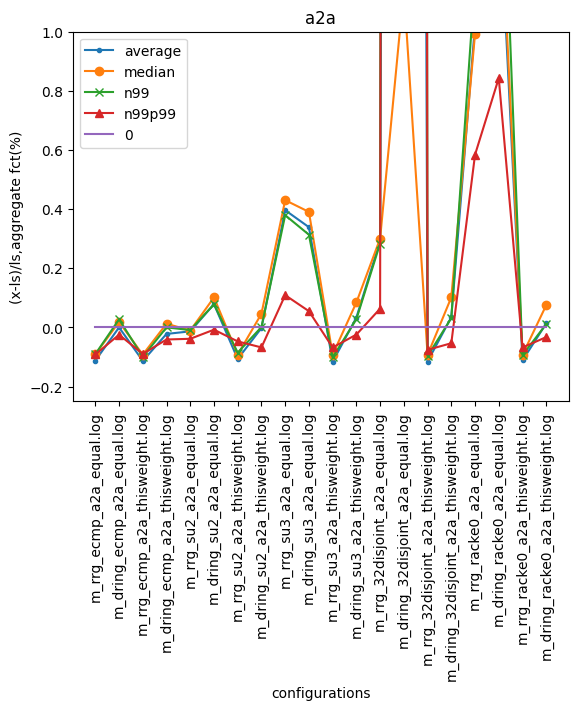

In [5]:
import matplotlib
import matplotlib.pyplot as plt

sumfile = f'/home/annzhou/DRing/src/emp/datacentre/experiments/rerun_sigcomm24/a2a.txt'
logfilelist = list()
averagelist = list()
medianlist = list()
n99list = list()
n99p99list = list()
lsaverage = 0
lsmedian = 0
lsn99 = 0
lsn99p99 = 0
with open(sumfile,'r') as f:
    lines = f.readlines()
    for iline,line in enumerate(lines):
        tokens = line.split()
        if iline==0:
            assert("leafspine" in tokens[0])
            lsaverage = float(tokens[1])
            lsmedian = float(tokens[2])
            lsn99 = float(tokens[3])
            lsn99p99 = float(tokens[4])
        else:
            logfile = tokens[0]
            average = float(tokens[1])
            median = float(tokens[2])
            n99 = float(tokens[3])
            n99p99 = float(tokens[4])
            logfilelist.append(logfile)
            averagelist.append((average-lsaverage)/lsaverage)
            medianlist.append((median-lsmedian)/lsmedian)
            n99list.append((n99-lsn99)/lsn99)
            n99p99list.append((n99p99-lsn99p99)/lsn99p99)

length = len(averagelist)
plt.plot(range(length),averagelist,label="average",marker='.')
plt.plot(range(length),medianlist,label="median",marker='o')
plt.plot(range(length),n99list,label="n99",marker='x')
plt.plot(range(length),n99p99list,label="n99p99",marker='^')
plt.plot(range(length),[0 for _ in range(length)],label="0")
plt.legend()
plt.xlabel("configurations")
plt.ylabel("(x-ls)/ls,aggregate fct(%)")
plt.xticks(ticks=range(length), labels=logfilelist, rotation=90)
plt.ylim(-0.25,1)
plt.title("a2a")
# plt.savefig(f"/home/annzhou/DRing/src/emp/datacentre/experiments/rerun_sigcomm24/a2a.png", bbox_inches='tight', dpi=500)
plt.show()
plt.close()